                       Linear Regression HW 1        Ashwin Vadivel

In [1]:
# import in required libraries (sklearn libraries imported later)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in housing dataset
housing_df = pd.read_csv("housing.csv")

In [3]:
# show first 5 rows of dataset
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# give quick description of column statistics 
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# 20,640 entries but 'total_bedrooms' feature only has 20,433
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# null values found in total_bedrooms column
housing_null = housing_df[housing_df.isna().any(axis=1)]
housing_null

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
# fill in null total_bedroom values with the median of the column
housing_df['total_bedrooms'].fillna(value=housing_df['total_bedrooms'].median(), inplace = True)

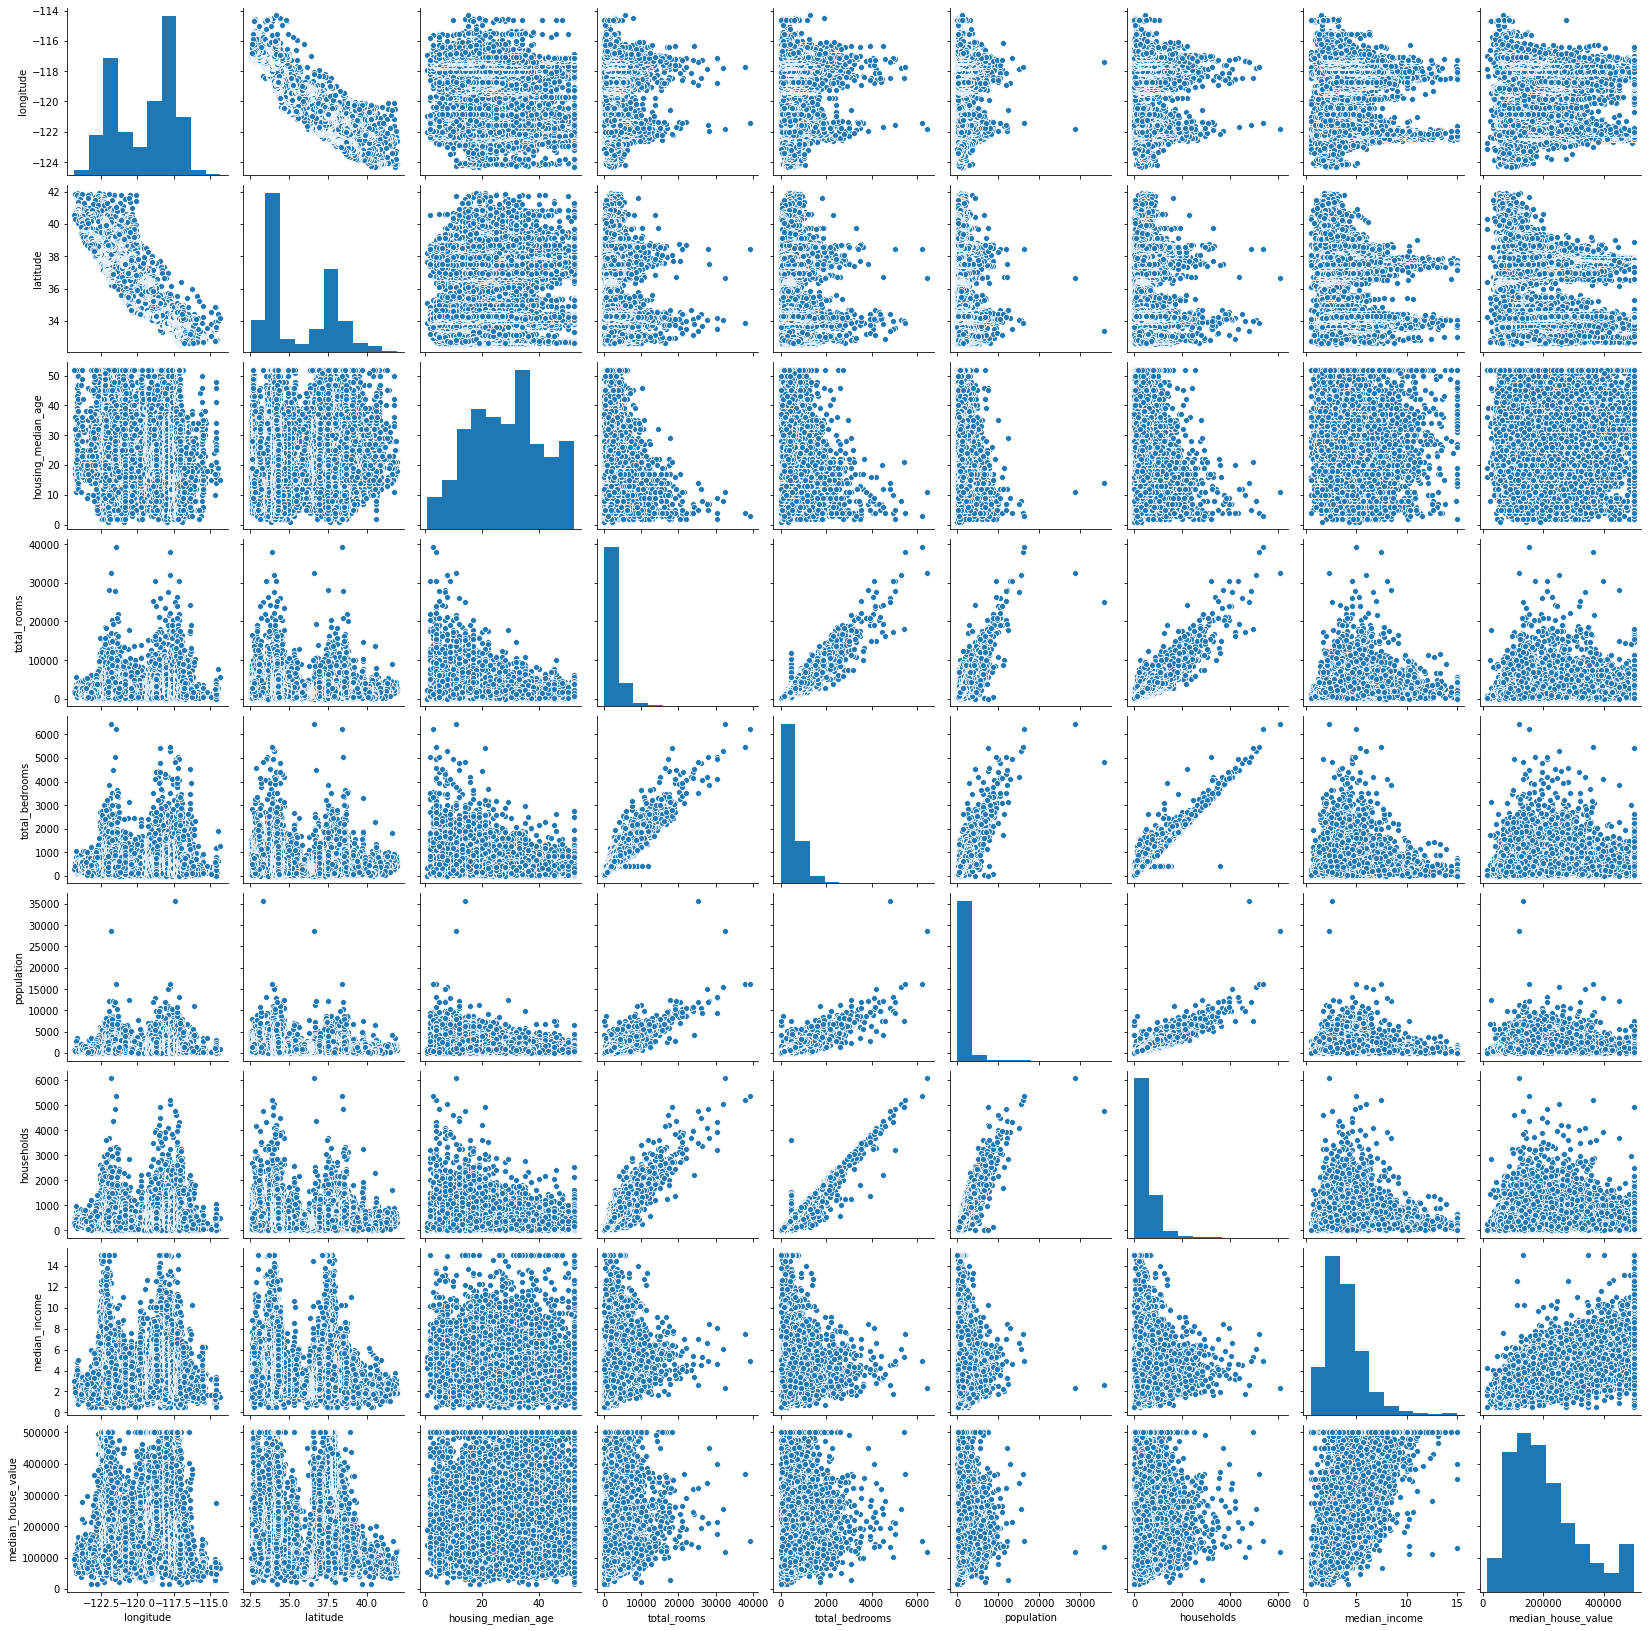

In [8]:
#generate seaborn pairplot to find approximately linear trends
sns.pairplot(housing_df)

In [9]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<AxesSubplot:>

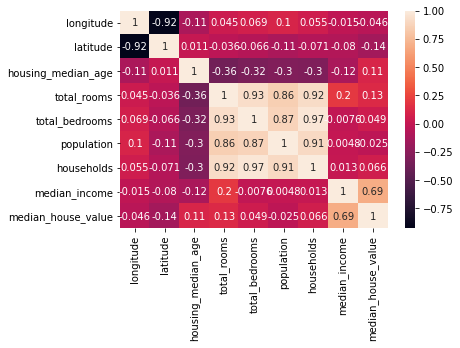

In [10]:
# heatmap showing most correlated feature to the output median house value is median income (looking at last column)
sns.heatmap(housing_df.corr(),annot = True)

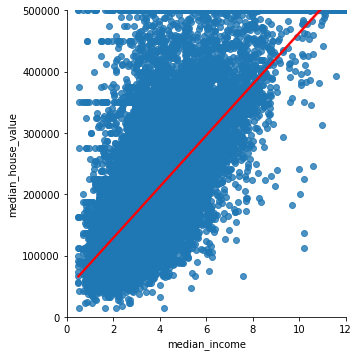

In [11]:
#closer look at median_income vs median_house_value with line of best fit
lm_plot = sns.lmplot(x='median_income',y='median_house_value',data=housing_df, line_kws={'color': 'red'})
lm_plot.set(ylim=(0, 500000))
lm_plot.set(xlim=(0, 12))

In [12]:
#Generate features vector X and output vector y
X = housing_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms','population', 'households', 'median_income']]
y = housing_df['median_house_value']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#split 30%-70% test-train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#create Linear Regression object
lm = LinearRegression()

In [17]:
#fit training data
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
# create coefficients dataframe
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
longitude,-42021.547550
latitude,-42172.235543
housing_median_age,1208.060242
total_rooms,-1.318357
population,-41.376339
households,144.803449
median_income,38168.733750


In [19]:
# predict output (y) for test set
predictions = lm.predict(X_test)

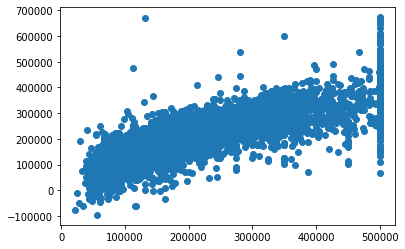

In [20]:
# prediction vs actual
plt.scatter(y_test,predictions)

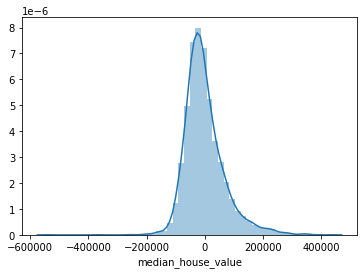

In [21]:
#distplot of difference between test data and predictions
sns.distplot((y_test-predictions),bins=50);

In [22]:
from sklearn import metrics

In [23]:
# show 3 popular regression metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 50455.53157436738
MSE: 4736827457.335685
RMSE: 68824.61374636028


In [24]:
## Since the final plot of (y_test - y_pred) has a normal Gaussian distribution
## with mean cenetered around 0, this shows a good fit for the linear regression model.